# CHRONIC DISEASE ANALYSIS

Chronic diseases are prevalent globally, affecting a significant proportion of the population. They are the leading cause of death and disability in many countries. They are often caused by a combination of genetic, environmental, and lifestyle factors, including tobacco use, unhealthy diets, physical inactivity, and alcohol consumption. 
It can often be prevented or their progression slowed by adopting healthy lifestyle habits and managing risk factors, such as maintaining a healthy diet, being physically active, and avoiding tobacco and excessive alcohol consumption.

## Objective

1) The objective of this project is to develop an accurate and efficient algorithm for chronic disease classification, which can be used to support the diagnosis and management of chronic diseases in healthcare. By analyzing large datasets of patient information, machine learning models can identify patterns and relationships that may not be apparent to human analysts, which can then be used to make predictions about a patient's likelihood of having a chronic disease.
2) So it can support healthcare professionals in the accurate and efficient diagnosis and management of chronic diseases.

## Importing necessary libraries

In [363]:
import pandas as pd
import numpy as np
from tkinter import *

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
import plotly.express as px
import seaborn as sns


#Feature selection
from sklearn.ensemble import ExtraTreesClassifier

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#Finding the best model
from sklearn.model_selection import GridSearchCV

from warnings import filterwarnings
filterwarnings('ignore')

#Performance Metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score


## Data Collection

The dataset for this project is collected from Kaggle.
It contains measures of 24 features + target class for 400 people.

Attribute information:
1) Age - age in years
2) Blood Pressure - bp in mm/Hg
3) Specific Gravity - sg - (1.005,1.010,1.015,1.020,1.025)
4) Albumin - al - (0,1,2,3,4,5) #protein made by your liver
5) Sugar - su - (0,1,2,3,4,5)
6) Red Blood Cells - rbc - (normal,abnormal)
7) Pus Cell - pc - (normal,abnormal) #collection of white dead blood cells
8) Pus Cell clumps - pcc - (present,notpresent) #clumps of the above
9) Bacteria - ba - (present,notpresent)
10) Blood Glucose Random - bgr in mgs/dl
11) Blood Urea - bu in mgs/dl
12) Serum Creatinine - sc in mgs/dl
13) Sodium - sod in mEq/L
14) Potassium - pot in mEq/L
15) Hemoglobin - hemo in gms
16) Packed Cell Volume - pcv #volume occupied by the red cells to the volume of whole blood
17) White Blood Cell Count - wc in cells/cumm
18) Red Blood Cell Count - rc in millions/cmm
19) Hypertension - htn - (yes,no)
20) Diabetes Mellitus - dm - (yes,no)
21) Coronary Artery Disease - cad - (yes,no)
22) Appetite - appet - (good,poor)
23) Pedal Edema - pe - (yes,no) #disease result of too much fluid in the tissues.
24) Anemia - ane - (yes,no)
25) Target Class- class - (ckd,notckd)

## Reading the Dataset

In [364]:
df = pd.read_csv('C:\\Users\\admin\\Desktop\\Chronic Disease\\Dataset\\Kidney_disease.csv')
df.shape

(400, 26)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

1) It is good to see that there are no missing values in our Target variable 'classification'. Still there are some features where we have a lot of missing values. 

2) Later, we will impute them using KNN imputer.


## Feature Engineering 

In [366]:
for i in df.drop("id",axis=1).columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

We can see that there are some unwanted characters in the values of the columns such as pcv, wc, rc, dm and classification. So we correct those misinformation.

In [367]:
for i in range(df.shape[0]):
    if df.iloc[i,25]=='ckd\t':
        df.iloc[i,25]='ckd'
    if df.iloc[i,20] in [' yes','\tyes']:
        df.iloc[i,20]='yes'
    if df.iloc[i,20]=='\tno':
        df.iloc[i,20]='no'
    if df.iloc[i,21]=='\tno':
        df.iloc[i,21]='no'
    if df.iloc[i,16]=='\t?':
        df.iloc[i,16]=np.nan
    if df.iloc[i,16]=='\t43':
        df.iloc[i,16]='43'
    if df.iloc[i,17]=='\t?':
        df.iloc[i,17]=np.nan
    if df.iloc[i,17]=='\t6200':
        df.iloc[i,17]= '6200'
    if df.iloc[i,17]=='\t8400':
        df.iloc[i,17]= '6200'
    if df.iloc[i,18]=='\t?':
        df.iloc[i,18]=np.nan
    if df.iloc[i,25]=='ckd':
        df.iloc[i,25]='yes'
    if df.iloc[i,25]=='notckd':
        df.iloc[i,25]='no'


### Drop the id column since it is not necessary

In [368]:
df.drop('id', axis = 1, inplace = True)

### Renaming the attribute names for better understanding

In [369]:
feature_names=['Age (yrs)','Blood Pressure (mm/Hg)','Specific Gravity','Albumin','Sugar','Red Blood Cells',
               'Pus Cells','Pus Cell Clumps','Bacteria','Blood Glucose Random (mgs/dL)','Blood Urea (mgs/dL)',
               'Serum Creatinine (mgs/dL)','Sodium (mEq/L)','Potassium (mEq/L)','Hemoglobin (gms)','Packed Cell Volume',
               'White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)','Hypertension','Diabetes Mellitus',
               'Coronary Artery Disease','Appetite','Pedal Edema','Anemia','Chronic Kidney Disease']
df.columns=feature_names

In [370]:
df.head(3)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,yes
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,yes
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,yes


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

We can see that columns such as Packed cell volume, White blood cells and Red blood cells contains values which are in string type instead  of being in numeric type. So we correct them.

In [372]:
misinfo =['Packed Cell Volume','White Blood Cells (cells/cmm)','Red Blood Cells (millions/cmm)']
numeric=[]
for i in df.columns:
    if df[i].dtype=='float64':
        numeric.append(i)
numeric=numeric+misinfo


for col in misinfo:
    df[col]=df[col].astype('float')

Let's check whether the above cell worked perfectly.

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

### Separating the numerical and categorical distribution 

In [374]:
#Categorical Features:
categoricals=[]
for col in df.columns:
    if not col in numeric:
        categoricals.append(col)
categoricals.remove('Chronic Kidney Disease')

In [375]:
categoricals

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

In [376]:
numeric

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

### Distribution of numerical variables

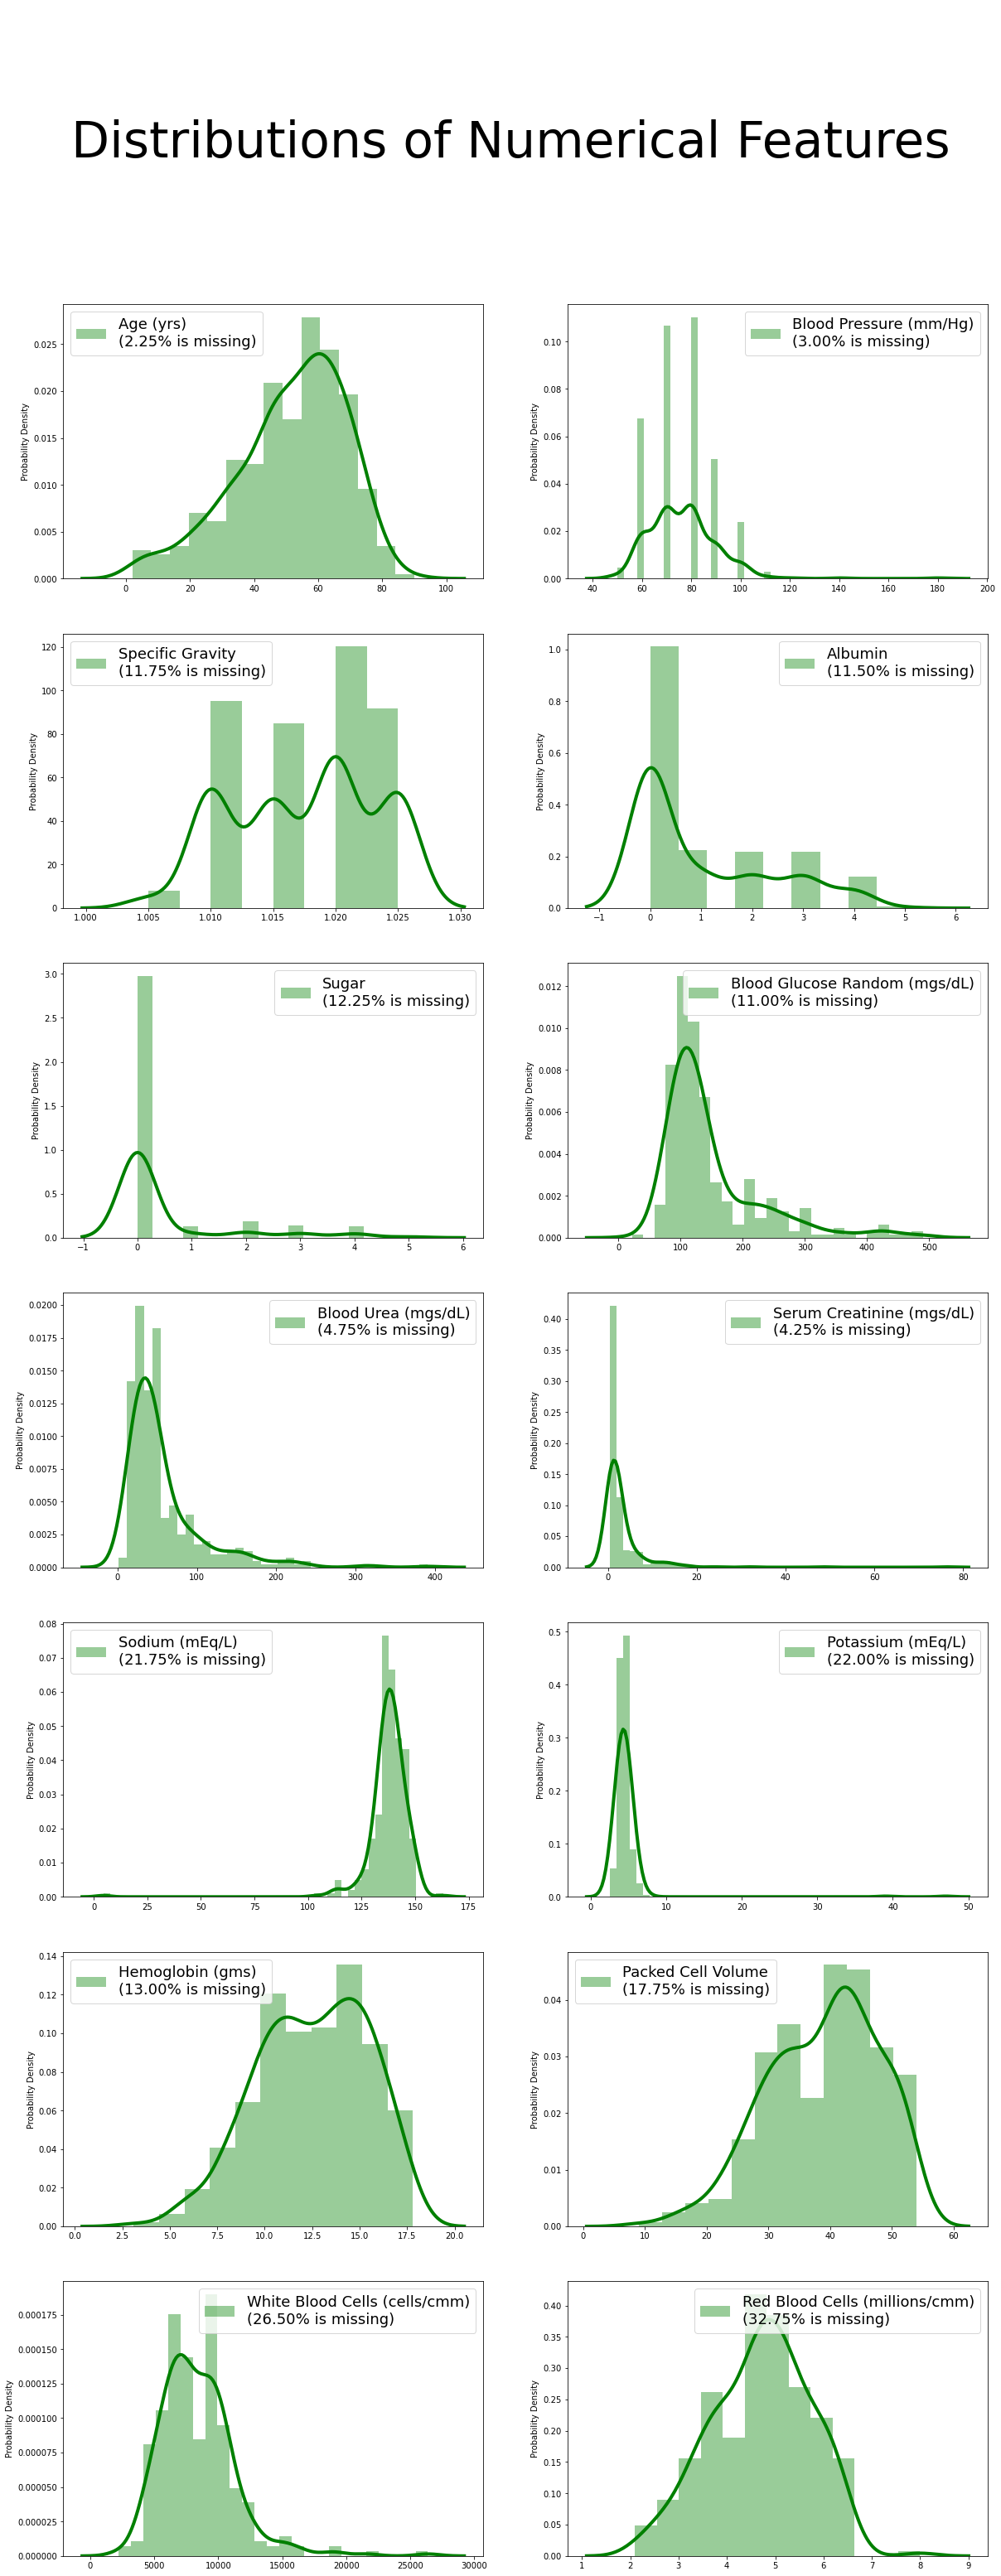

In [377]:
n_rows, n_cols = (7,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(20, 50))
figure.suptitle('\n\nDistributions of Numerical Features', fontsize=60)

for index, column in enumerate(numeric):
    
    i,j = (index // n_cols), (index % n_cols)
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig=sns.distplot(df[column], color="g", label=collabel, norm_hist=True,
    
    ax=axes[i,j], kde_kws={"lw":4})
    fig=fig.legend(loc='best', fontsize=18)
    
    axes[i,j].set_ylabel("Probability Density",fontsize='medium')
    
    axes[i,j].set_xlabel(None)
    
plt.show()

We can see that there are some outliers and missing values in the dataset which will be handled further. Also presense of skewnees in some features is also identified.

### Categorical feature counts

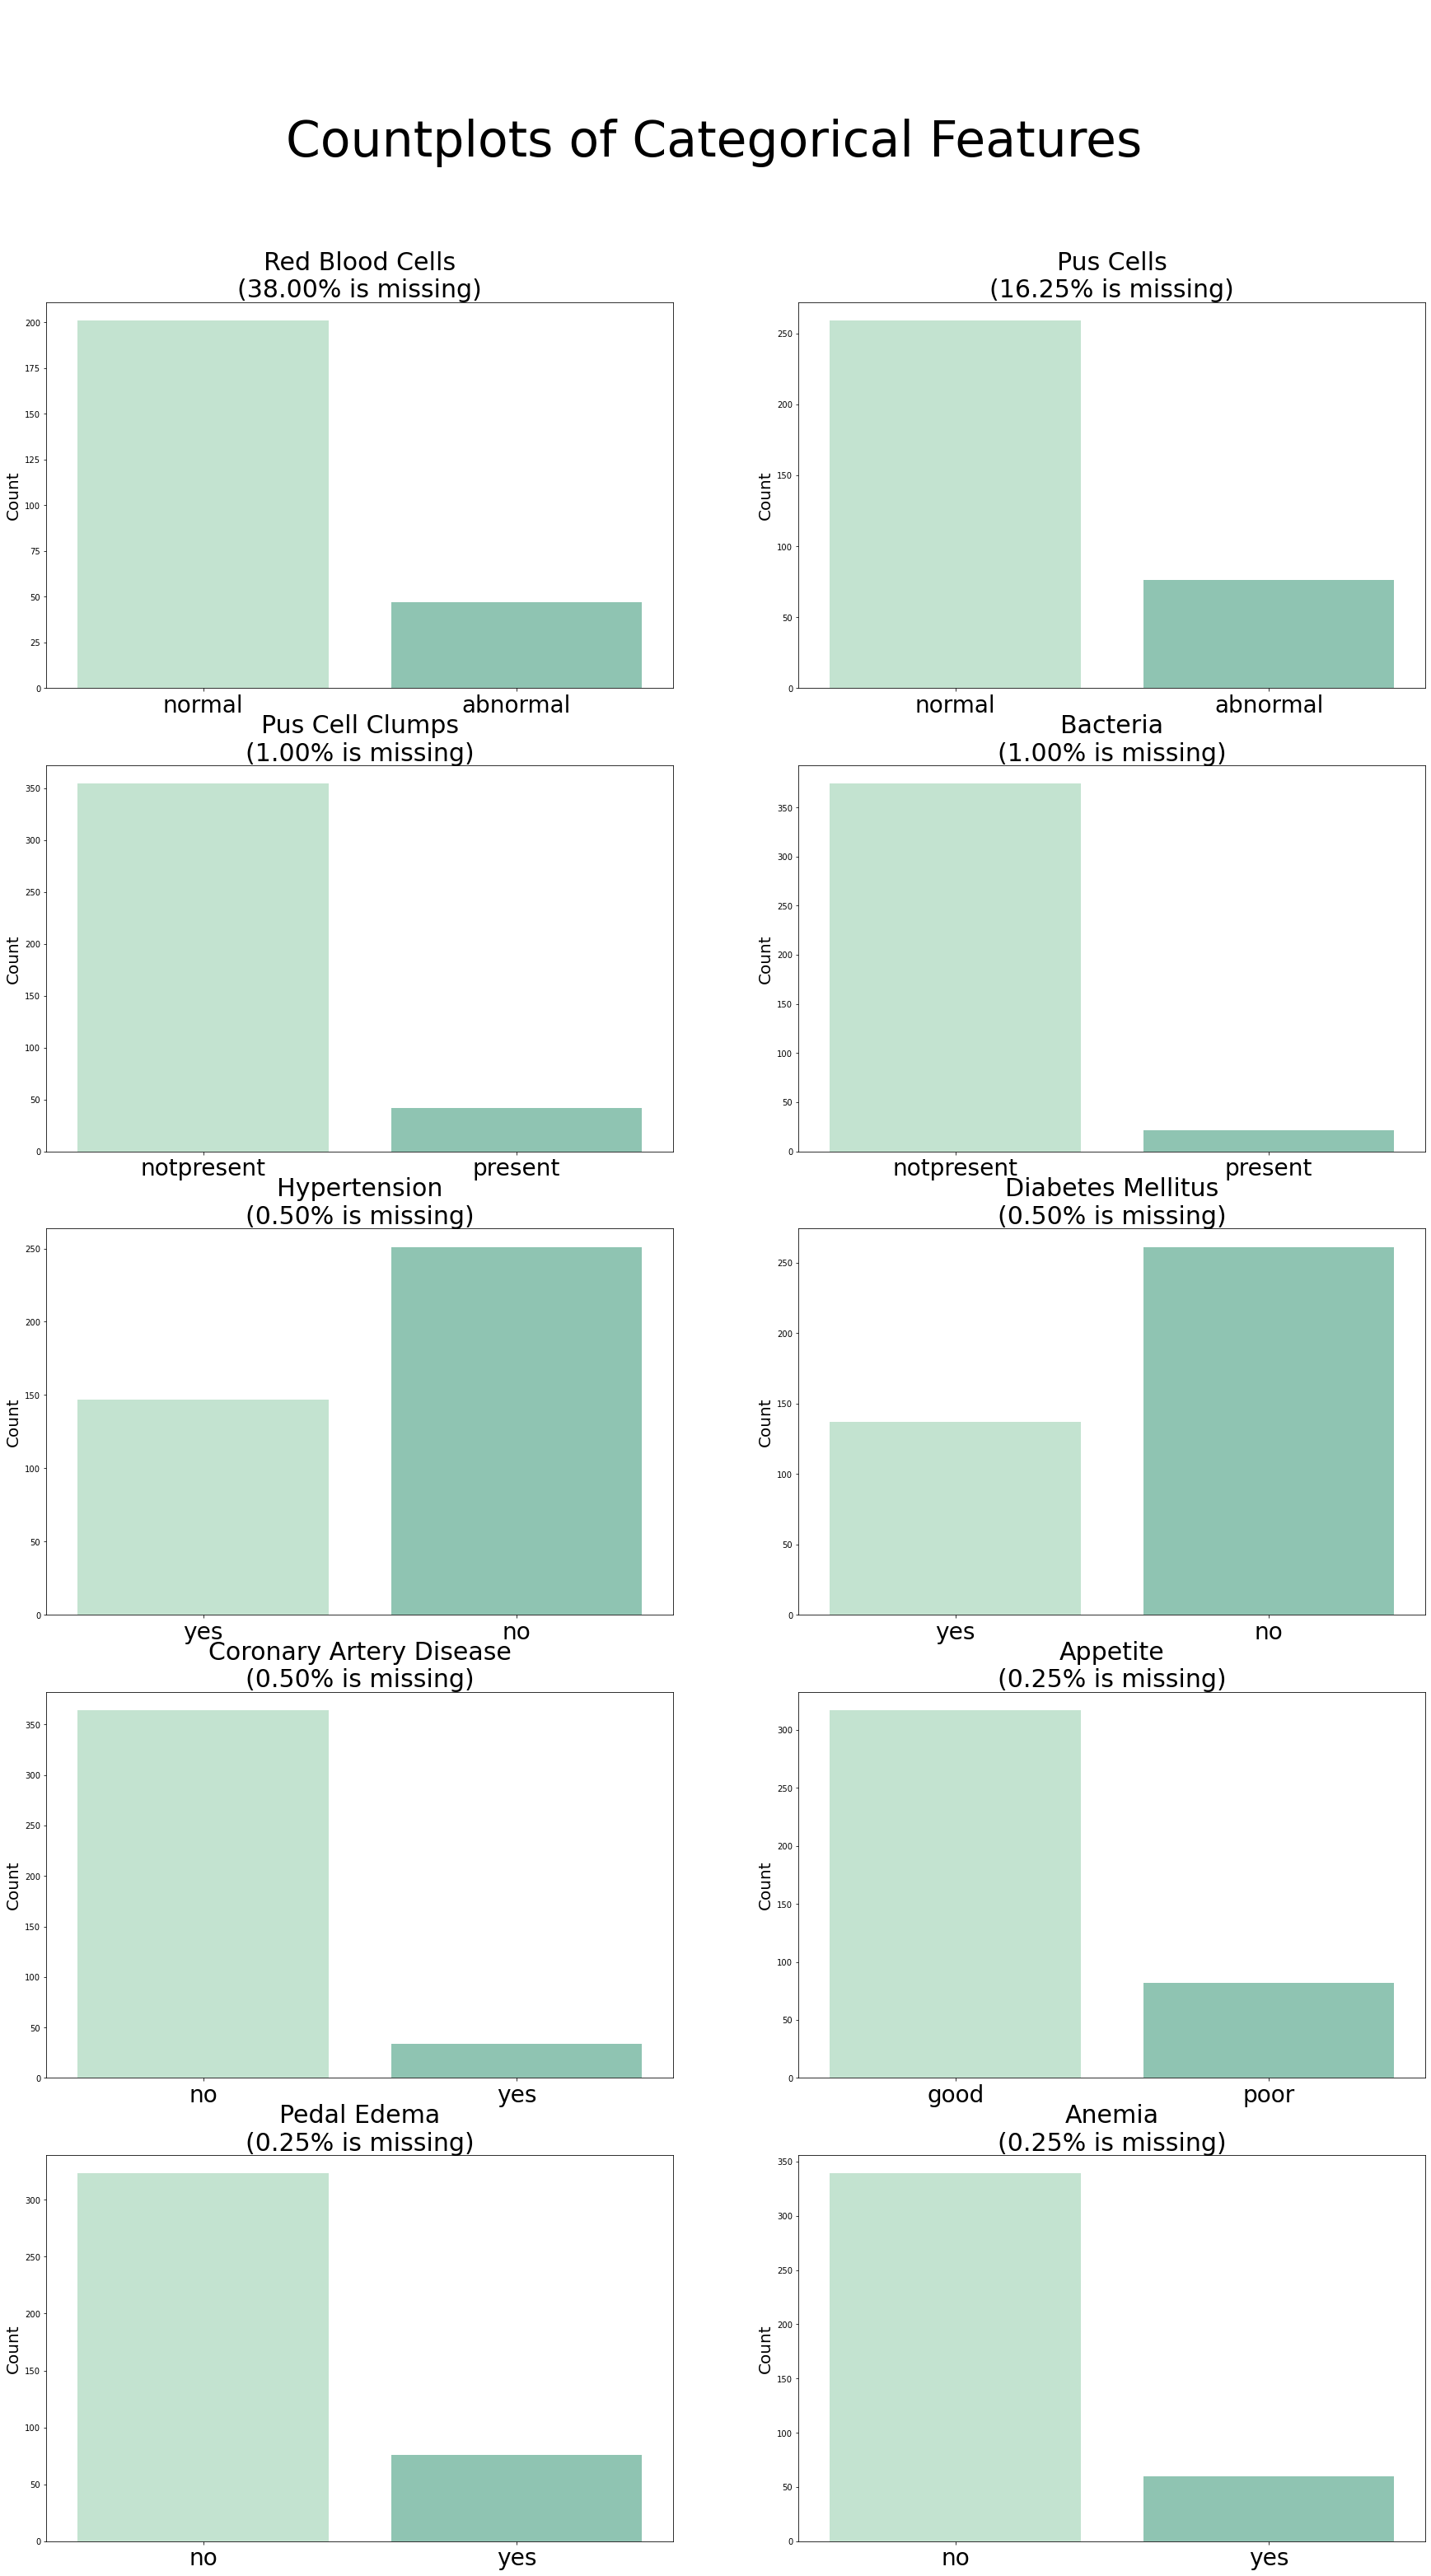

In [378]:
n_rows, n_cols = (5,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30, 50))
figure.suptitle('\n\nCountplots of Categorical Features', fontsize=60)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    
    miss_perc="%.2f"%(100*(1-(df[column].dropna().shape[0])/df.shape[0]))
    
    collabel=column+"\n({}% is missing)".format(miss_perc)
    
    fig = sns.countplot(x=column, data=df,label=collabel, palette=sns.cubehelix_palette(rot=-.35,light=0.85,hue=1),
    
    ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=30)
    
    axes[i,j].set_xlabel(None)
    
    axes[i,j].set_ylabel("Count",fontsize=20)
    
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), fontsize=28)

plt.show()

In [379]:
import missingno as mno

# Missing value - bar plot

<AxesSubplot:>

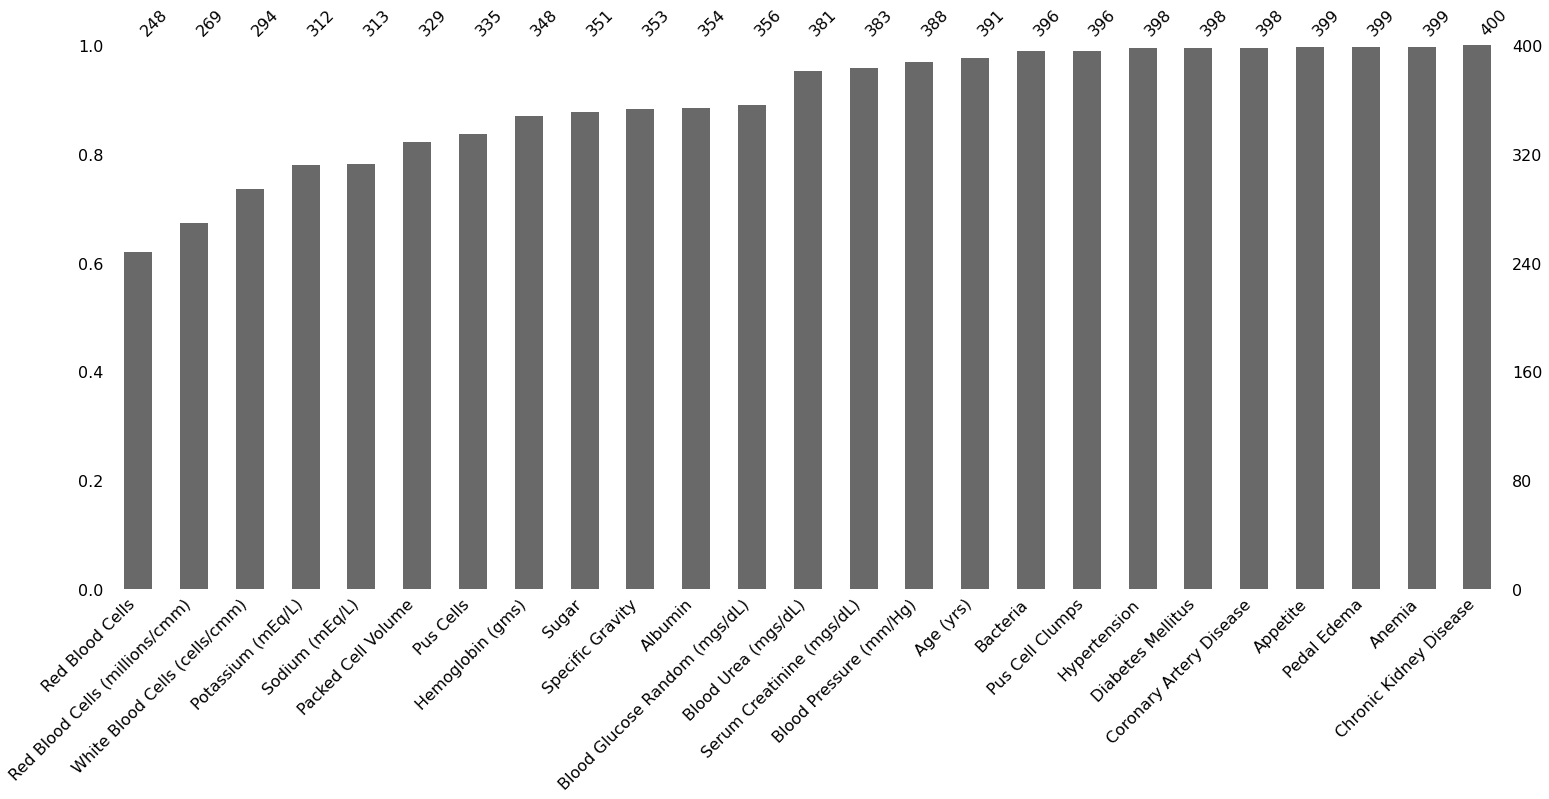

In [380]:
mno.bar(df,sort = "ascending")

### Imputation of missing values

In [381]:
#columns with missing values
feature_na = [i for i in df.columns if df[i].isnull().sum()>0]
feature_na

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

In [382]:
#Numerical columns
a = [i for i in df.columns if (df[i].dtypes!='object') and (i in feature_na)]
a

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [383]:
#Categorical columns
b = [i for i in feature_na if i not in a]
b

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia']

In [384]:
for i in a:
    temp = round(df[i].mean(),3)
    df[i].replace(np.nan,temp,inplace=True)

In [385]:
 df.replace({'Red Blood Cells' : {'normal' : 0, 'abnormal' : 1},
            'Pus Cells' : {'normal' : 0, 'abnormal' : 1},
            'Pus Cell Clumps' : {'present' : 0, 'notpresent' : 1},
            'Bacteria' : {'present' : 0, 'notpresent' : 1},
            'Hypertension' : {'yes' : 0, 'no' : 1},
            'Diabetes Mellitus' : {'yes' : 0, 'no' : 1},
            'Coronary Artery Disease' : {'yes' : 0, 'no' : 1},
            'Appetite' : {'good' : 0, 'poor' : 1},
            'Pedal Edema' : {'yes' : 0, 'no' : 1},
            'Anemia' : {'yes' : 0, 'no' : 1},
            'Chronic Kidney Disease' : {'no' : 0, 'yes' : 1}},
           inplace=True)

In [386]:
df.head(3)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.02,1.0,0.0,NaN,0.0,1.0,1.0,121.000,...,44.0,7800.0,5.200,0.0,0.0,1.0,0.0,1.0,1.0,1
1,7.0,50.0,1.02,4.0,0.0,NaN,0.0,1.0,1.0,148.037,...,38.0,6000.0,4.707,1.0,1.0,1.0,0.0,1.0,1.0,1
2,62.0,80.0,1.01,2.0,3.0,0.0,0.0,1.0,1.0,423.000,...,31.0,7500.0,4.707,1.0,0.0,1.0,1.0,1.0,0.0,1


In [387]:
#Filling NaN in categorical variables with mode
lst = ['Red Blood Cells','Pus Cells','Pus Cell Clumps','Bacteria','Hypertension','Diabetes Mellitus','Coronary Artery Disease','Appetite','Pedal Edema',
 'Anemia']
for i in lst:
    df[i] = df[i].fillna(df[i].mode()[0])

In [388]:
df.head(3)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.02,1.0,0.0,0.0,0.0,1.0,1.0,121.000,...,44.0,7800.0,5.200,0.0,0.0,1.0,0.0,1.0,1.0,1
1,7.0,50.0,1.02,4.0,0.0,0.0,0.0,1.0,1.0,148.037,...,38.0,6000.0,4.707,1.0,1.0,1.0,0.0,1.0,1.0,1
2,62.0,80.0,1.01,2.0,3.0,0.0,0.0,1.0,1.0,423.000,...,31.0,7500.0,4.707,1.0,0.0,1.0,1.0,1.0,0.0,1


### Handling Outliers

In [389]:
out = ['Age (yrs)',
       'Blood Pressure (mm/Hg)',
       'Serum Creatinine (mgs/dL)',
       'Sodium (mEq/L)',
       'Potassium (mEq/L)',
       'Hemoglobin (gms)',
       'Packed Cell Volume',
       'Red Blood Cells (millions/cmm)'
      ]
fig = px.box(df[out], y = out)
fig.show()

In [390]:
fig1 = px.box(df['White Blood Cells (cells/cmm)'],y='White Blood Cells (cells/cmm)')
fig1.show()

In [391]:
fig1 = px.box(df['Blood Glucose Random (mgs/dL)'],y='Blood Glucose Random (mgs/dL)')
fig1.show()

In [392]:
df.columns

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease'],
      dtype='object')

In [393]:
fig1 = px.box(df['Blood Urea (mgs/dL)'],y='Blood Urea (mgs/dL)')
fig1.show()

### Replacing the outliers with IQR

In [394]:
def IQR_1(col):

    Q1 = np.percentile(df[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(df[col], 75,
                       interpolation = 'midpoint')
    
    per_95 = np.percentile(df[col], 95,
                       interpolation = 'midpoint')
    
    IQR = Q3 - Q1
    
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    df[col] = np.where(df[col] > upper, per_95, df[col])
    df[col] = np.where(df[col] < lower, lower, df[col])

    return df

for col in a:
    df = IQR_1(col)

In [395]:
out = ['Age (yrs)',
       'Blood Pressure (mm/Hg)',
       'Serum Creatinine (mgs/dL)',
       'Sodium (mEq/L)',
       'Potassium (mEq/L)',
       'Hemoglobin (gms)',
       'Packed Cell Volume',
       'Red Blood Cells (millions/cmm)'
      ]
fig = px.box(df[out], y = out)
fig.show()

In [396]:
fig1 = px.box(df['White Blood Cells (cells/cmm)'],y='White Blood Cells (cells/cmm)')
fig1.show()

In [397]:
fig1 = px.box(df['Blood Glucose Random (mgs/dL)'],y='Blood Glucose Random (mgs/dL)')
fig1.show()

In [398]:
fig1 = px.box(df['Blood Urea (mgs/dL)'],y='Blood Urea (mgs/dL)')
fig1.show()

From all the boxplots above after using IQR, we can see that the occurence of outliers have been significantly reduced

In [399]:
#Handling those remaining with Z-score:
#z-score
h = ['Blood Urea (mgs/dL)','Blood Glucose Random (mgs/dL)', 'Blood Pressure (mm/Hg)',
       'Serum Creatinine (mgs/dL)' ]
def z_score1(i):
    df['z_s'] = (df[i] - df[i].mean())/df[i].std()
    df[i] = np.where(df['z_s'] < -2, df[i].min() , df[i])
    df[i] = np.where(df['z_s'] > 2, df[i].max() , df[i])

for i in h:
    z_score1(i)
df.drop(['z_s'],axis=1,inplace=True)

In [400]:
df.head(3)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease
0,48.0,80.0,1.02,1.0,0.0,0.0,0.0,1.0,1.0,121.000,...,44.0,7800.0,5.200,0.0,0.0,1.0,0.0,1.0,1.0,1
1,9.0,55.0,1.02,4.0,0.0,0.0,0.0,1.0,1.0,148.037,...,38.0,6000.0,4.707,1.0,1.0,1.0,0.0,1.0,1.0,1
2,62.0,80.0,1.01,2.0,3.0,0.0,0.0,1.0,1.0,303.000,...,31.0,7500.0,4.707,1.0,0.0,1.0,1.0,1.0,0.0,1


### Feature Selection 

In [401]:
df.rename(columns={'Chronic Kidney Disease':'class'},inplace=True)
df.corr(method='pearson')

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Glucose Random (mgs/dL),...,Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,class
Age (yrs),1.000000,0.158566,-0.190324,0.120487,0.239709,0.011481,0.104680,-0.159487,-0.044903,0.242072,...,-0.221032,0.115232,-0.222062,-0.394891,-0.364727,-0.234555,0.158776,-0.096679,-0.050791,0.232392
Blood Pressure (mm/Hg),0.158566,1.000000,-0.208992,0.184484,0.207604,0.179203,0.154946,-0.072321,-0.136822,0.175586,...,-0.295732,0.019506,-0.228796,-0.275519,-0.229165,-0.101653,0.156878,-0.039182,-0.207841,0.310997
Specific Gravity,-0.190324,-0.208992,1.000000,-0.465588,-0.309891,-0.225245,-0.336218,0.283750,0.219169,-0.363872,...,0.540677,-0.204262,0.507568,0.376020,0.401970,0.158501,-0.248529,0.268536,0.218068,-0.709500
Albumin,0.120487,0.184484,-0.465588,1.000000,0.307145,0.373926,0.535155,-0.399747,-0.367854,0.340125,...,-0.529038,0.153277,-0.480819,-0.481727,-0.378045,-0.236747,0.330563,-0.440893,-0.282308,0.599241
Sugar,0.239709,0.207604,-0.309891,0.307145,1.000000,0.063857,0.174009,-0.161761,-0.126343,0.616884,...,-0.236856,0.185231,-0.221460,-0.313383,-0.487251,-0.309144,0.112566,-0.146687,-0.100487,0.346204
Red Blood Cells,0.011481,0.179203,-0.225245,0.373926,0.063857,1.000000,0.377394,-0.102948,-0.184402,0.164748,...,-0.281351,0.012518,-0.205492,-0.140538,-0.145646,-0.111493,0.160868,-0.199285,-0.107625,0.282642
Pus Cells,0.104680,0.154946,-0.336218,0.535155,0.174009,0.377394,1.000000,-0.520118,-0.330401,0.271920,...,-0.414166,0.065853,-0.392210,-0.291719,-0.201032,-0.172295,0.274985,-0.350227,-0.260566,0.375154
Pus Cell Clumps,-0.159487,-0.072321,0.283750,-0.399747,-0.161761,-0.102948,-0.520118,1.000000,0.275082,-0.179408,...,0.290217,-0.132381,0.270492,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,-0.265313
Bacteria,-0.044903,-0.136822,0.219169,-0.367854,-0.126343,-0.184402,-0.330401,0.275082,1.000000,-0.080875,...,0.191843,-0.092086,0.200970,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,-0.186871
Blood Glucose Random (mgs/dL),0.242072,0.175586,-0.363872,0.340125,0.616884,0.164748,0.271920,-0.179408,-0.080875,1.000000,...,-0.307037,0.152209,-0.293676,-0.406508,-0.529387,-0.228817,0.204984,-0.139193,-0.127182,0.433051


<AxesSubplot:>

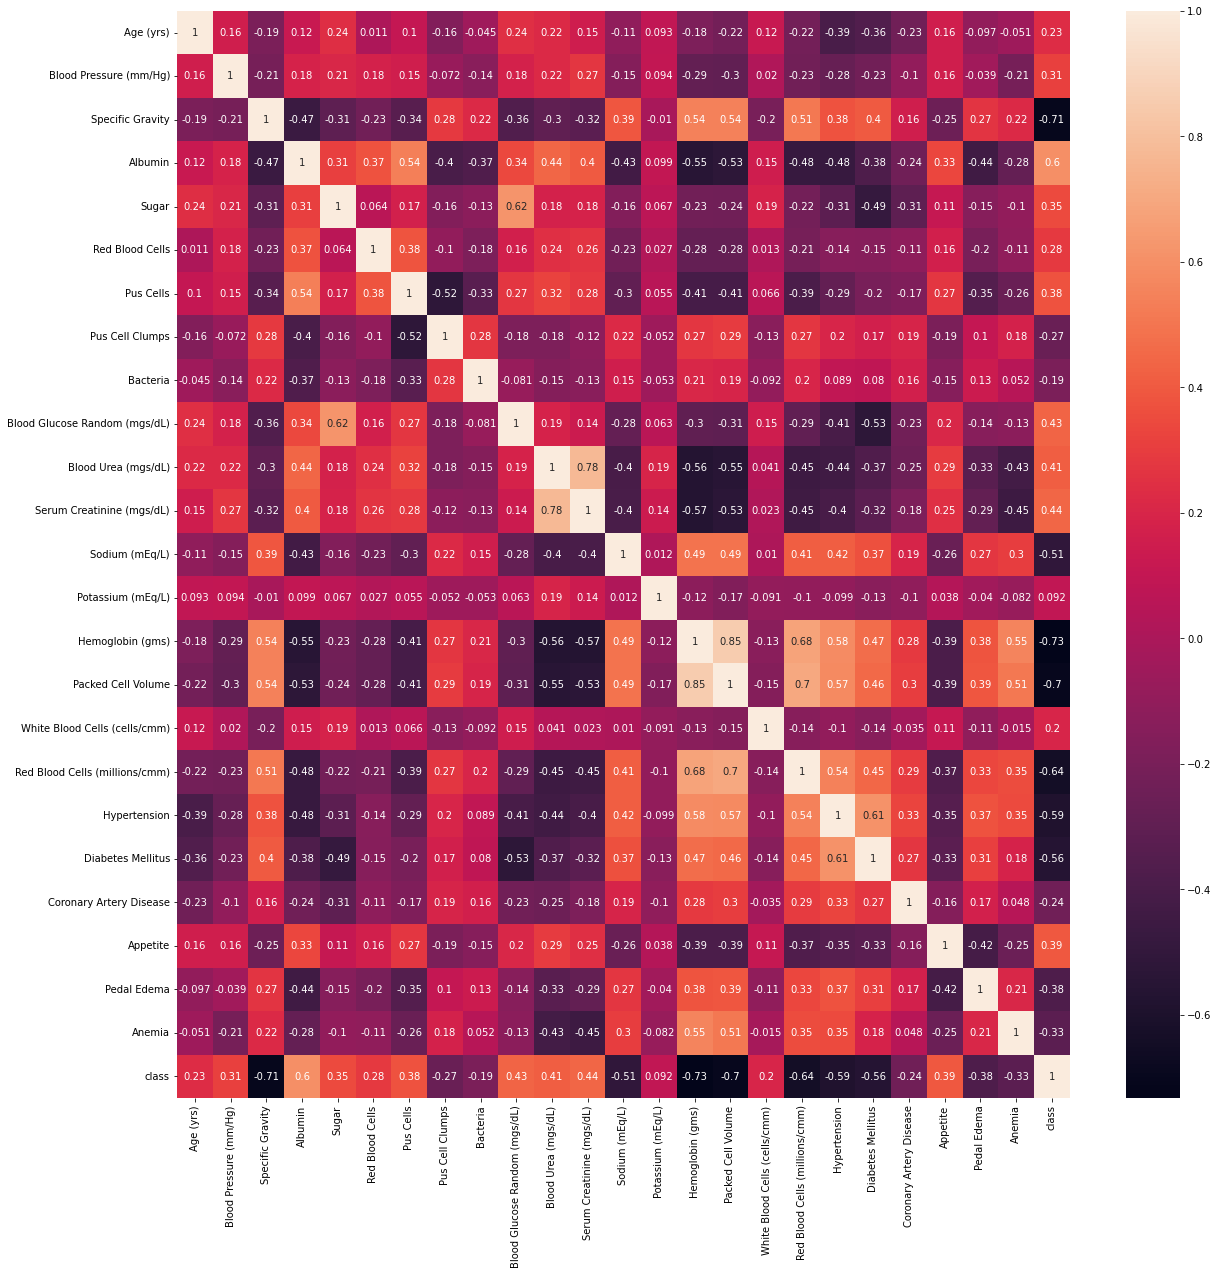

In [402]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'),annot=True)

Haemoglobin is highly correlated with Packed cell volume.
Red Blood Cells is highly correlated with Packed cell volume.
Red Blood cells is highly correlated with Haemoglobin. So we can remove Packed Cell Volume and Haemoglobin.


Blood Glucose Random is highly correlated with Sugar.
Blood Urea is highly correlated with Serum Creatinine.
Hypertension is highly correlated with Diabetes mellitus. So we can remove Blood Glucose Random, Serum Creatinine and Hypertension


In [403]:
df.drop(['Red Blood Cells (millions/cmm)','Packed Cell Volume'],axis=1,inplace=True)

df.drop(['Blood Glucose Random (mgs/dL)','Serum Creatinine (mgs/dL)','Hypertension'],axis=1,inplace=True)

<AxesSubplot:>

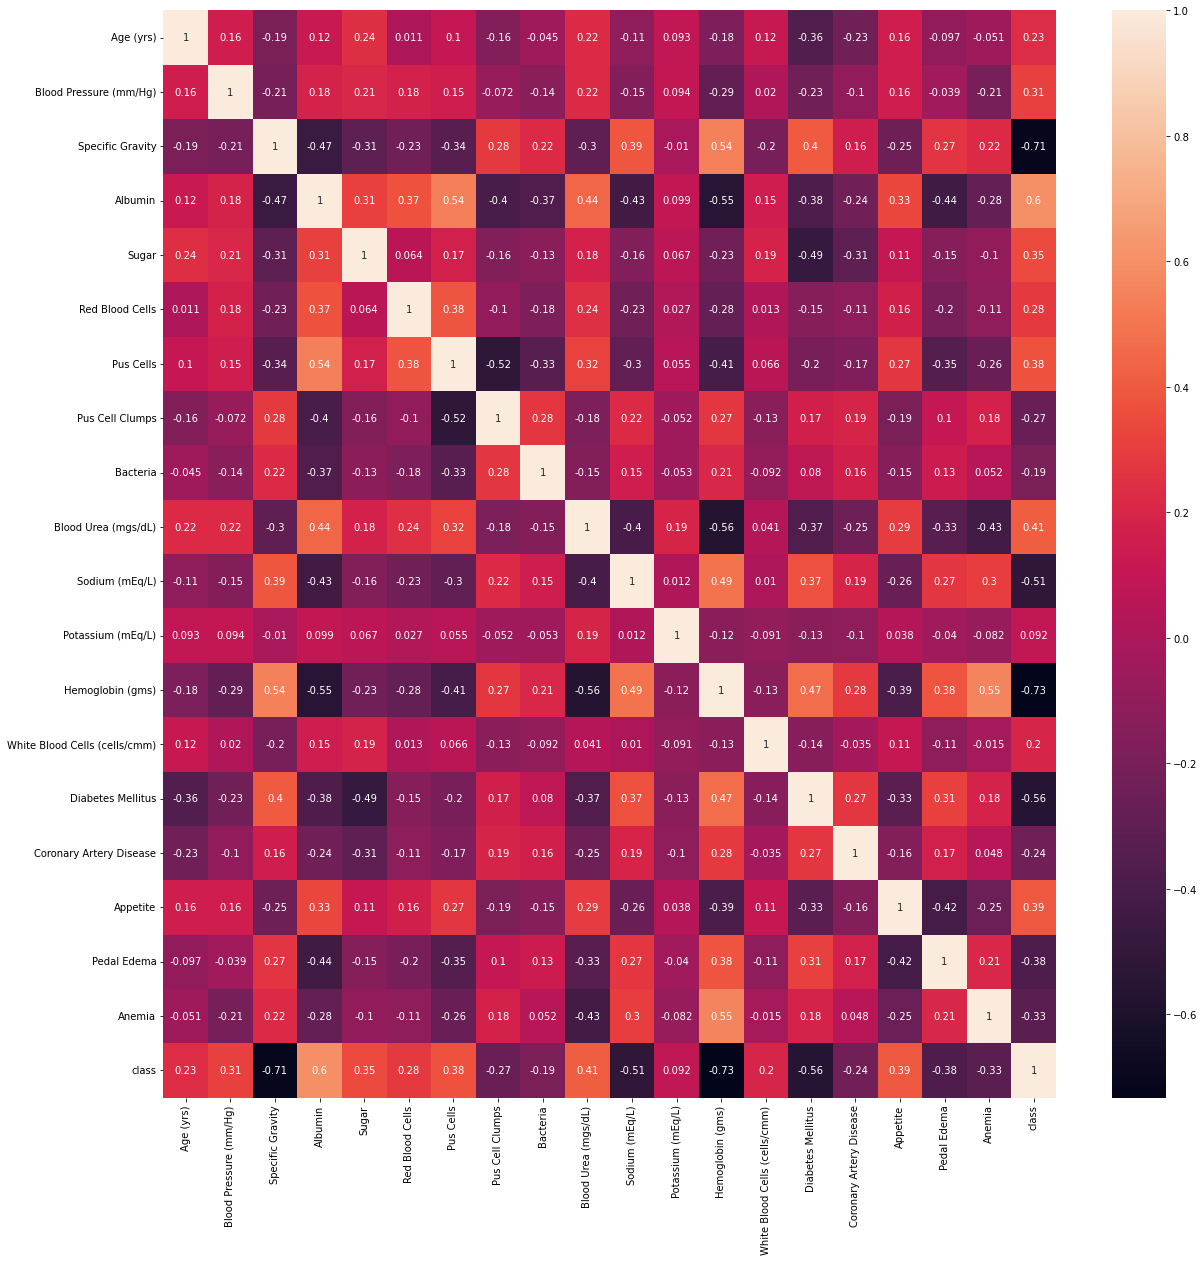

In [404]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method='pearson'),annot=True)

In [405]:
b.remove('Hypertension')

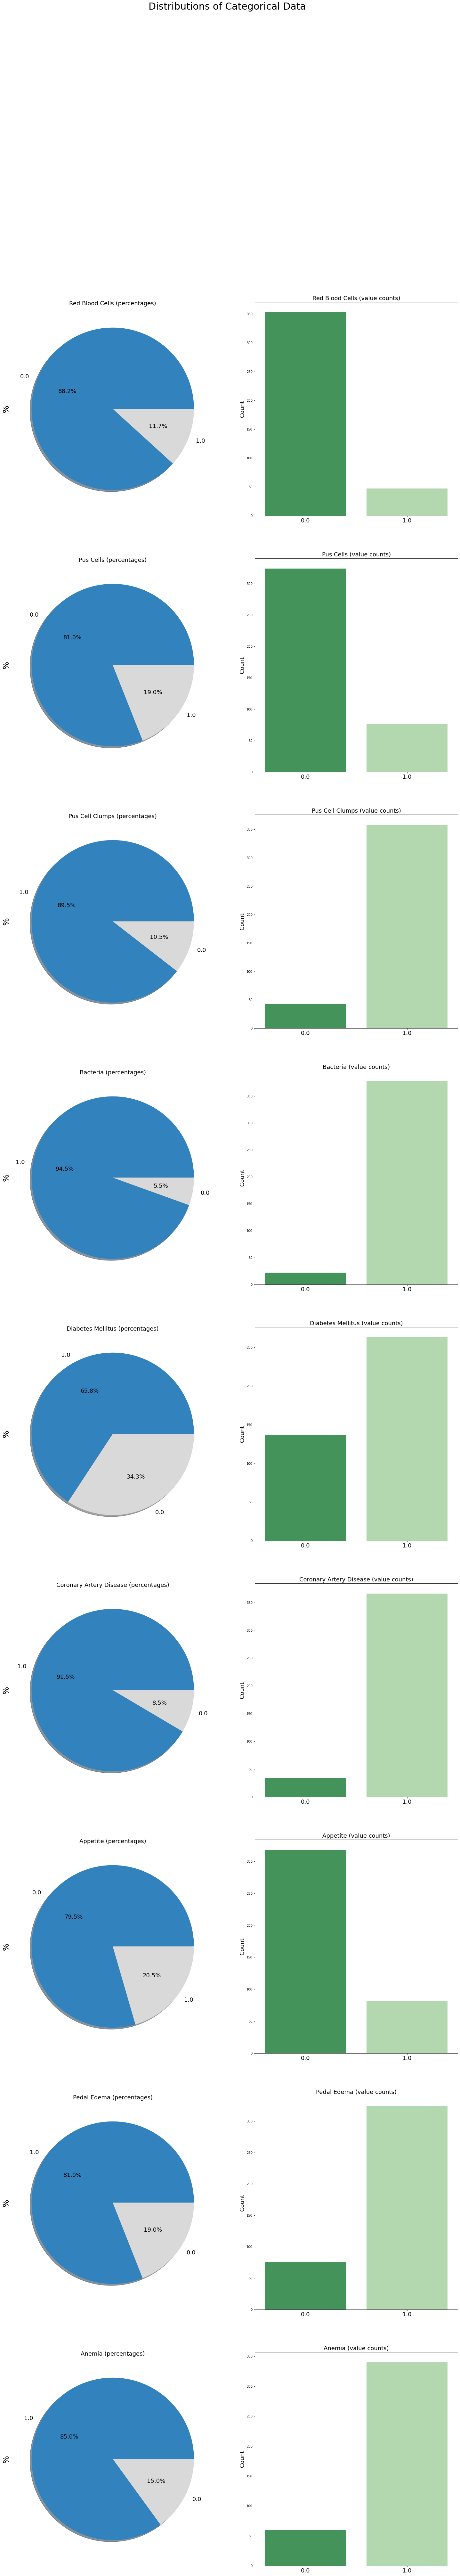

In [406]:
n_rows, n_cols = (9,2)

figure, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(25, 130))
figure.suptitle('Distributions of Categorical Data', fontsize=30)

for i in range(len(b)):
    column=b[i]
    graph1=df[column].value_counts().plot.pie(autopct='%1.1f%%',
                                                      ax=axes[i,0],
                                                      colormap="tab20c",
                                                      fontsize=18,
                                                      shadow=True)
    axes[i,0].set_ylabel('%',fontsize=25)
    axes[i,0].set_title(column+' (percentages)', fontsize=18)
    graph2=sns.countplot(x=column,
                         data=df,
                         palette='Greens_r',
                         ax=axes[i,1])
    axes[i,1].set_xlabel(None)
    axes[i,1].set_ylabel('Count',fontsize=18)
    axes[i,1].set_xticklabels(axes[i,1].get_xticklabels(), fontsize=18)
    axes[i,1].set_title(column+' (value counts)', fontsize=18)

In [407]:
numeric

['Age (yrs)',
 'Blood Pressure (mm/Hg)',
 'Specific Gravity',
 'Albumin',
 'Sugar',
 'Blood Glucose Random (mgs/dL)',
 'Blood Urea (mgs/dL)',
 'Serum Creatinine (mgs/dL)',
 'Sodium (mEq/L)',
 'Potassium (mEq/L)',
 'Hemoglobin (gms)',
 'Packed Cell Volume',
 'White Blood Cells (cells/cmm)',
 'Red Blood Cells (millions/cmm)']

In [408]:
numeric.remove('Red Blood Cells (millions/cmm)')
numeric.remove('Packed Cell Volume')
numeric.remove('Blood Glucose Random (mgs/dL)')
numeric.remove('Serum Creatinine (mgs/dL)')

In [415]:
df.head(3)

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,Blood Urea (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),White Blood Cells (cells/cmm),Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,class
0,48.0,80.0,1.02,1.0,0.0,0.0,0.0,1.0,1.0,36.0,137.529,4.627,15.4,7800.0,0.0,1.0,0.0,1.0,1.0,1
1,9.0,55.0,1.02,4.0,0.0,0.0,0.0,1.0,1.0,18.0,137.529,4.627,11.3,6000.0,1.0,1.0,0.0,1.0,1.0,1
2,62.0,80.0,1.01,2.0,3.0,0.0,0.0,1.0,1.0,53.0,137.529,4.627,9.6,7500.0,0.0,1.0,1.0,1.0,0.0,1


In [413]:
X = df.drop('class',axis=1)
y = df['class'].astype(int)

### Feature importance

[0.00850579 0.02455118 0.22354974 0.14601432 0.02649777 0.01540256
 0.03379577 0.00364964 0.00091366 0.02378588 0.03653688 0.00866498
 0.14516271 0.00746166 0.17774626 0.00273908 0.05774955 0.03778366
 0.0194889 ]


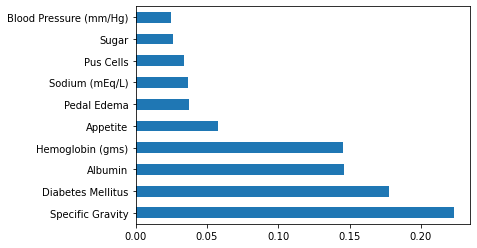

In [412]:
model = ExtraTreesClassifier(random_state=820)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [416]:
ft = feat_importances.nlargest(10).index

In [420]:
ft.tolist()

['Specific Gravity',
 'Diabetes Mellitus',
 'Albumin',
 'Hemoglobin (gms)',
 'Appetite',
 'Pedal Edema',
 'Sodium (mEq/L)',
 'Pus Cells',
 'Sugar',
 'Blood Pressure (mm/Hg)']

In [421]:
X_selected=df[ft]

### Modeling

In [422]:
model_params = {
    'logistic_regression' : {
        'model' : LogisticRegression(random_state=8),
        'params' : {
            'C' : [1,5,10]
        }
    },
    
    'decision_tree' : {
        'model' : DecisionTreeClassifier(random_state=21),
        'params' : {
            'max_depth' : [5,10,15],
            'max_leaf_nodes' : [5,10,15]
        }
    },
    
    'random_forest' : {
        'model' : RandomForestClassifier(random_state=20),
        'params' : {
            'n_estimators' : [50,100,150],
            'criterion' : ['entropy','gini']
        }
    },
    
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [3,5,7],
            'weights' : ['uniform','distance']
        }
    }
    }   

In [423]:
scores = []

for model_name, mp in model_params.items():
    
    grid = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    grid.fit(X_selected, y)
    scores.append({
        'model' : model_name,
        'best_score' : grid.best_score_,
        'best_params' : grid.best_params_
    })

In [424]:
pd.DataFrame(scores)

,model,best_score,best_params
0,logistic_regression,0.9625,{'C': 10}
1,decision_tree,0.9750,"{'max_depth': 10, 'max_leaf_nodes': 10}"
2,random_forest,0.9875,"{'criterion': 'gini', 'n_estimators': 50}"
3,knn,0.9550,"{'n_neighbors': 3, 'weights': 'distance'}"


Random Forest fits well. So we will use that for prediction

In [425]:
rf_1= RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=23)
rf_1.fit(X_selected,y)

RandomForestClassifier(criterion='entropy', random_state=23)

In [426]:
root = Tk()

root.geometry("800x600")
root.title("KIDNEY DISEASE DIAGNOSIS")
root.configure(bg="ivory")
global Name
global Age

def submit():
    Name = name1.get()
    Age = age.get()
    Gender = clicked1.get()
    hemo_1=hemo1.get()
    dm=clicked3.get()
    dm_val = 0 if dm =='YES' else 1
    sg=clicked4.get()
    al=clicked5.get()
    appet=clicked6.get()
    pe=clicked7.get()
    pe_val = 0 if pe =='YES' else 1
    sod=clicked8.get()
    pc=clicked9.get()
    pc_val = 0 if dm =='NORMAL' else 1
    rbc=clicked10.get()
    rbc_val = 0 if dm =='NORMAL' else 1
    bu_1=bu1.get()
    
    new_input = [[hemo_1,dm_val,float(sg),al,appet,pe_val,sod,bu_1,pc_val,rbc_val]]
    y_pred = rf_1.predict(new_input)
    print(y_pred)
    
    if(y_pred==1):
        Label20 = Label(root,text="RESULT: AFFECTED BY KIDNEY DISEASE",font="times 12 bold")
        Label20.grid(row=13,column=3)
    if(y_pred==0):
        Label21= Label(root,text="RESULT: NOT AFFECTED BY KIDNEY DISEASE",font="times 12 bold")
        Label21.grid(row=13,column=3)

#CREATING LABEL
Label1 = Label(root, text="Kidney Disease Diagnosis", font="none 14 bold")
Label1.grid(row=0,column=1)

Label2 = Label(root, text="ENTER PATIENT NAME")
Label2.grid(row=1, column=0)

Label3 = Label(root, text="ENTER PATIENT AGE")
Label3.grid(row=2, column=0)

Label4 = Label(root, text="ENTER PATIENT GENDER")
Label4.grid(row=3,column=0)

Label5 = Label(root, text="HEMOGLOBIN LEVEL")
Label5.grid(row=4, column=0)

Label6 = Label(root, text="PRESENCE OF DIABETES MELLITUS")
Label6.grid(row=5, column=0)

Label7 = Label(root, text="SPECIFIC GRAVITY LEVEL")
Label7.grid(row=6,column=0)

Label8 = Label(root, text="ALUMINIUM ")
Label8.grid(row=7, column=0)

Label9 = Label(root, text="APPETITE")
Label9.grid(row=8, column=0)

Label10 = Label(root, text="PRESENCE OF PEDAL EDEMA")
Label10.grid(row=9,column=0)

Label11 = Label(root, text="SODIUM LEVEL")
Label11.grid(row=10, column=0)

Label12 = Label(root, text="BLOOD UREA LEVEL")
Label12.grid(row=11, column=0)

Label14 = Label(root, text="PRESENCE OF PUS CELL")
Label14.grid(row=12, column=0)

Label15 = Label(root, text="RED BLOOD CELL LEVEL")
Label15.grid(row=13, column=0)

options1=[0,1]
options2=['MALE','FEMALE','OTHER']
options3=[0,1,2,3,4,5]
options4=['YES','NO']
options5 = [1.005,1.010,1.015,1.020,1.025]
options6= [i for i in range(135,151)]
options7=['NORMAL','ABNORMAL']

clicked1 = StringVar()
clicked1.set(options2[0])

drop1 = OptionMenu(root, clicked1, *options2)
drop1.grid(row=3,column=1,pady=3, padx=40)

clicked3 = StringVar()
clicked3.set(options4[0])

drop3 = OptionMenu(root, clicked3, *options4)
drop3.grid(row=5,column=1,pady=3, padx=40)

clicked4 = StringVar()
clicked4.set(options5[0])

drop4 = OptionMenu(root, clicked4, *options5)
drop4.grid(row=6,column=1,pady=3, padx=40)

clicked5 = IntVar()
clicked5.set(options3[0])

drop5 = OptionMenu(root, clicked5, *options3)
drop5.grid(row=7,column=1,pady=3, padx=40)

clicked6 = IntVar()
clicked6.set(options3[0])

drop6 = OptionMenu(root, clicked6, *options3)
drop6.grid(row=8,column=1,pady=3, padx=40)

clicked7 = StringVar()
clicked7.set(options4[0])

drop7 = OptionMenu(root, clicked7, *options4)
drop7.grid(row=9,column=1,pady=3, padx=40)

clicked8 = IntVar()
clicked8.set(options6[0])

drop8 = OptionMenu(root, clicked8, *options6)
drop8.grid(row=10,column=1,pady=3, padx=40)

clicked9 = StringVar()
clicked9.set(options7[0])

drop9 = OptionMenu(root, clicked9, *options7)
drop9.grid(row=12,column=1,pady=3, padx=40)

clicked10 = StringVar()
clicked10.set(options7[0])

drop10 = OptionMenu(root, clicked10, *options7)
drop10.grid(row=13,column=1,pady=3, padx=40)

name1 = Entry(root,width=60,borderwidth=10)
name1.grid(row=1,column=1,padx=50,pady=20)

age = Entry(root,width=60,borderwidth=10)
age.grid(row=2,column=1,padx=50,pady=20)

hemo_1=DoubleVar()
bu_1=DoubleVar()

hemo1 = Entry(root,width=60,textvariable=hemo_1,borderwidth=10)
hemo1.grid(row=4,column=1,padx=50,pady=20)

bu1 = Entry(root,width=60,textvariable=bu_1,borderwidth=10)
bu1.grid(row=11,column=1,padx=50,pady=20)

submit = Button(root, text="CHECK RESULT",command=submit)
submit.grid(row=12,column=3,padx=50,pady=20)

root.mainloop()